<a href="https://colab.research.google.com/github/Rebecabl/20-projects-data/blob/main/python_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files


uploaded = files.upload()


Saving unicorns till sep 2022.csv to unicorns till sep 2022.csv


In [4]:

Base_Dados = pd.read_csv('unicorns till sep 2022.csv')


Base_Dados.shape

(1186, 7)

In [5]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [7]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [8]:
Base_Dados.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

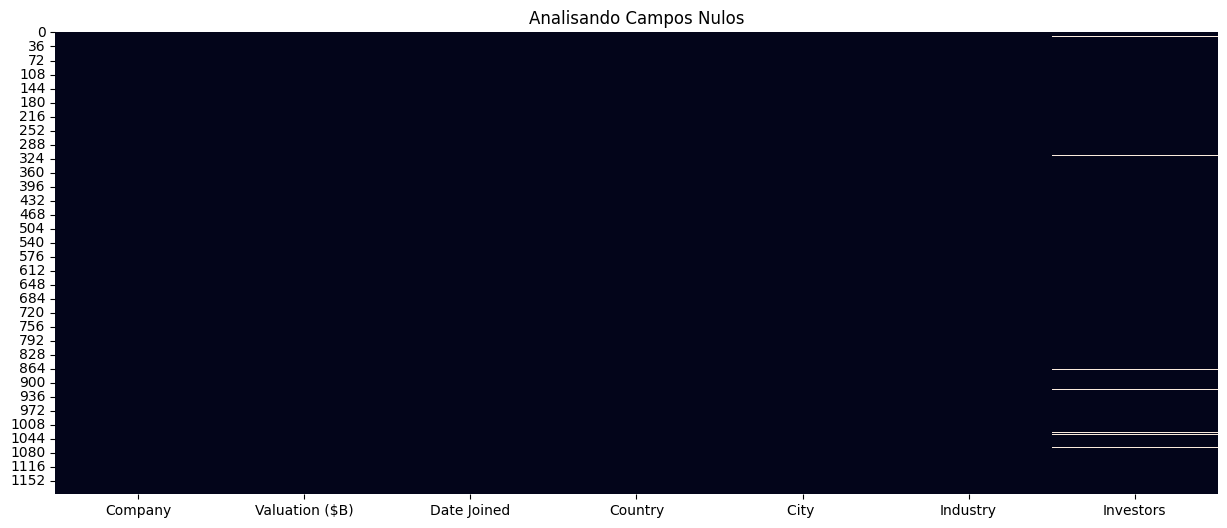

In [9]:
plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [10]:
Base_Dados.nunique()

Company           1183
Valuation ($B)     222
Date Joined        695
Country             48
City               286
Industry            34
Investors         1152
dtype: int64

In [12]:
Base_Dados['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [13]:
Base_Dados['Industry'].value_counts( normalize=True )

Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                              

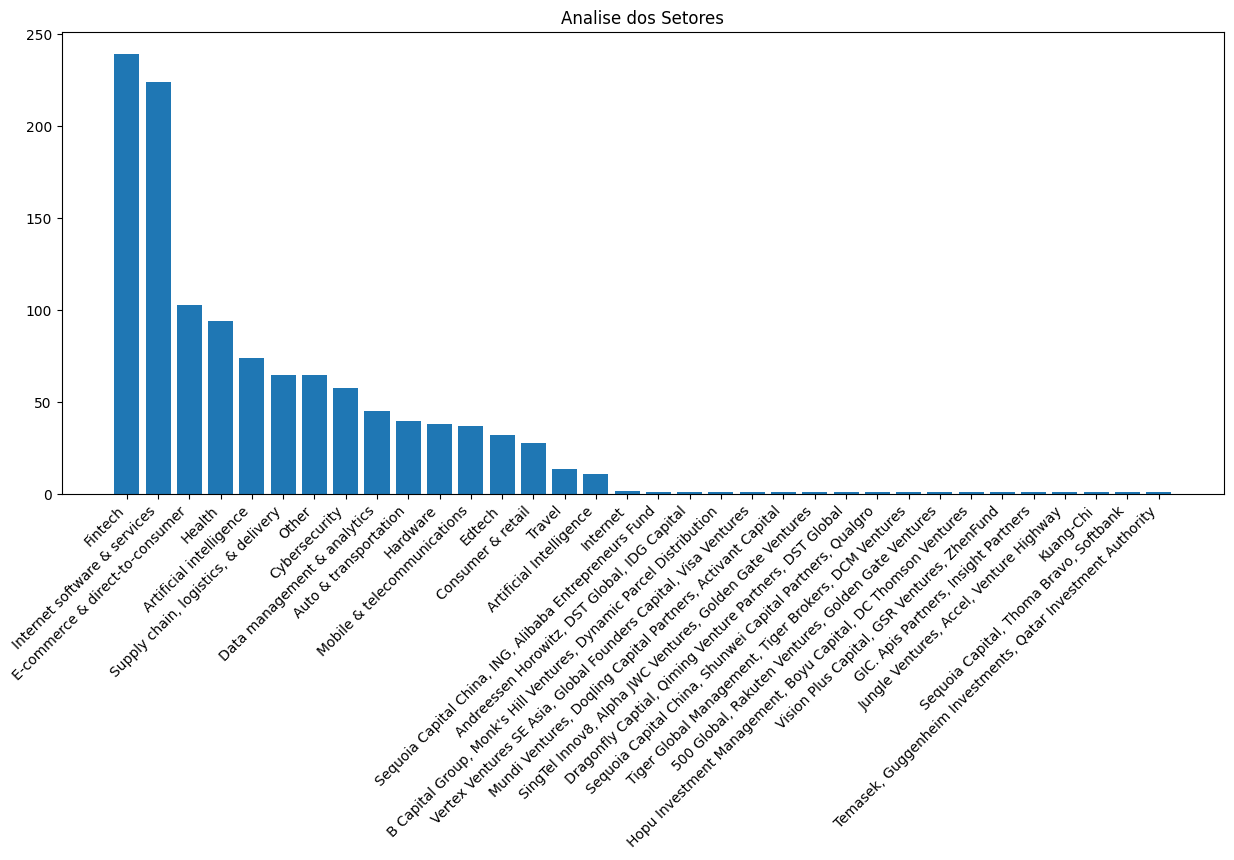

In [15]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Industry'].value_counts().index, Base_Dados['Industry'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

In [17]:
Analise = round( Base_Dados['Country'].value_counts( normalize=True ) * 100, 1 )

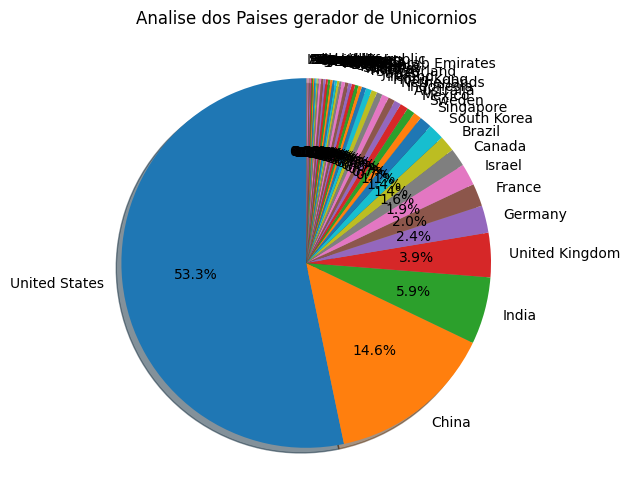

In [18]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios')
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

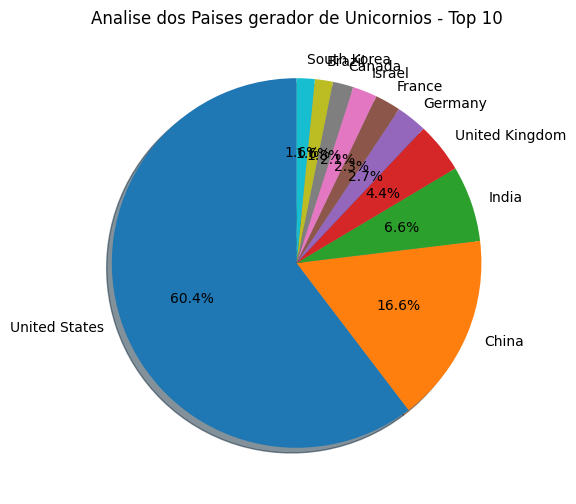

In [19]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [21]:
Base_Dados['Date Joined'] = pd.to_datetime( Base_Dados['Date Joined'] )

Base_Dados['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [22]:
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Date Joined'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Date Joined'] ).year

Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
